In [40]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, LSTM, Activation, Dense, Dropout, Input, Embedding, TimeDistributed, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import matplotlib.pyplot as plt

In [41]:
# - creates a model that categorizes images as digits
# - Train on 60000 samples, validate on 10000 samples
# - val_loss: 0.0654 - val_acc: 0.9792 | epoch 4

# what will happen if RNN/LSTM is used for image tasks?
# RNN/LSTM is used  successfully on images with a sequential pattern - i.e. like mnist image dataset or video frames
# Alternative approach for these type of tasks seems to be an CNN|RNN model. 

In [42]:
EPOCHES = 10

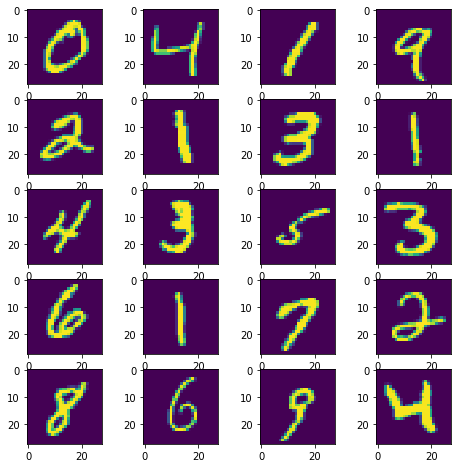

In [43]:
# GET DATA
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = x_train/255.0
x_test = x_test/255.0

fig=plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = x_train[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()


In [44]:
def RNN(): 
    model = Sequential()
    model.add(LSTM(128, input_shape=(x_train.shape[1:]), activation='relu', return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(128, activation='relu'))
    model.add(Dropout(0.1))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer='adam',
        metrics=['accuracy'],
    )
    return model

In [45]:
model = RNN()

In [46]:
history = model.fit(x_train,
          y_train,
          epochs=EPOCHES,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 613s 10ms/step - loss: 0.5772 - acc: 0.8084 - val_loss: 0.1534 - val_acc: 0.9544
Epoch 2/10
60000/60000 [==============================] - 684s 11ms/step - loss: 0.1661 - acc: 0.9552 - val_loss: 0.1101 - val_acc: 0.9684
Epoch 3/10
60000/60000 [==============================] - 828s 14ms/step - loss: 0.1057 - acc: 0.9709 - val_loss: 0.0641 - val_acc: 0.9817
Epoch 4/10
60000/60000 [==============================] - 773s 13ms/step - loss: 0.0946 - acc: 0.9749 - val_loss: 0.0654 - val_acc: 0.9792
Epoch 5/10
60000/60000 [==============================] - 811s 14ms/step - loss: 0.0699 - acc: 0.9816 - val_loss: 0.0636 - val_acc: 0.9820
Epoch 6/10
60000/60000 [==============================] - 804s 13ms/step - loss: 0.0598 - acc: 0.9838 - val_loss: 0.0471 - val_acc: 0.9854
Epoch 7/10
60000/60000 [==============================] - 753s 13ms/step - loss: 0.0558 - acc: 0.9847 - val_loss: 0.

In [19]:
#model.save_weights('models/rnn_image_10_epochs.h5') # save model

In [47]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

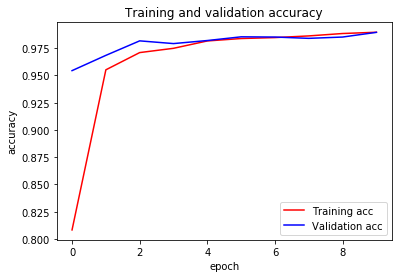

<Figure size 432x288 with 0 Axes>

In [48]:
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()

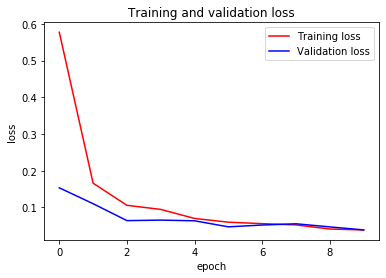

In [49]:
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.show()

In [83]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

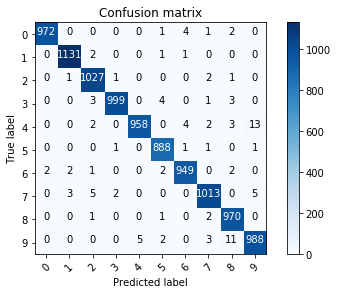

In [86]:
from sklearn.metrics import classification_report, multilabel_confusion_matrix, confusion_matrix
from itertools import *

predicted_classes = model.predict(x_test)
Y_pred_classes = np.argmax(predicted_classes, axis = 1) 
confusion_mtx = confusion_matrix(y_test, Y_pred_classes) 
plot_confusion_matrix(confusion_mtx, classes = range(10))